<div style="background-color: #F6FB7A; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Loading Data</strong></h1>
</div> 

In [29]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Read data

df = pd.read_csv('/kaggle/input/healthcare-insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<div style="background-color: #F6FB7A; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Exploratory data analysis (EDA)</strong></h1>
</div>

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


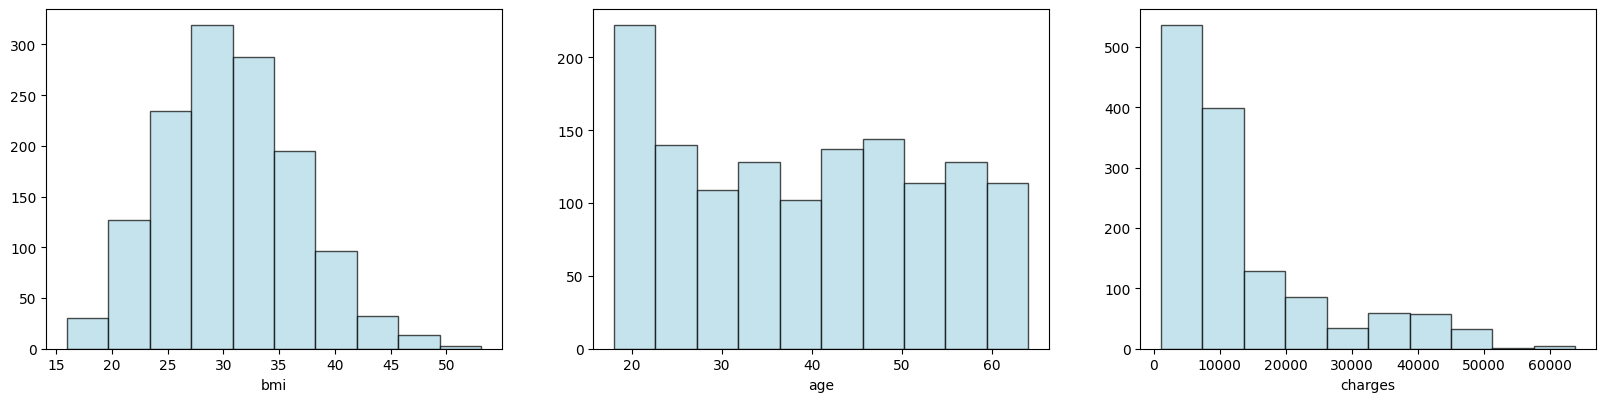

In [34]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

1. Age shows uniform distribution.
2. bmi shows normal distribution.
3. Charges shows normal distribution, but it skewed  to right

<div style="background-color: #F6FB7A; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Outliers</strong></h1>
</div>

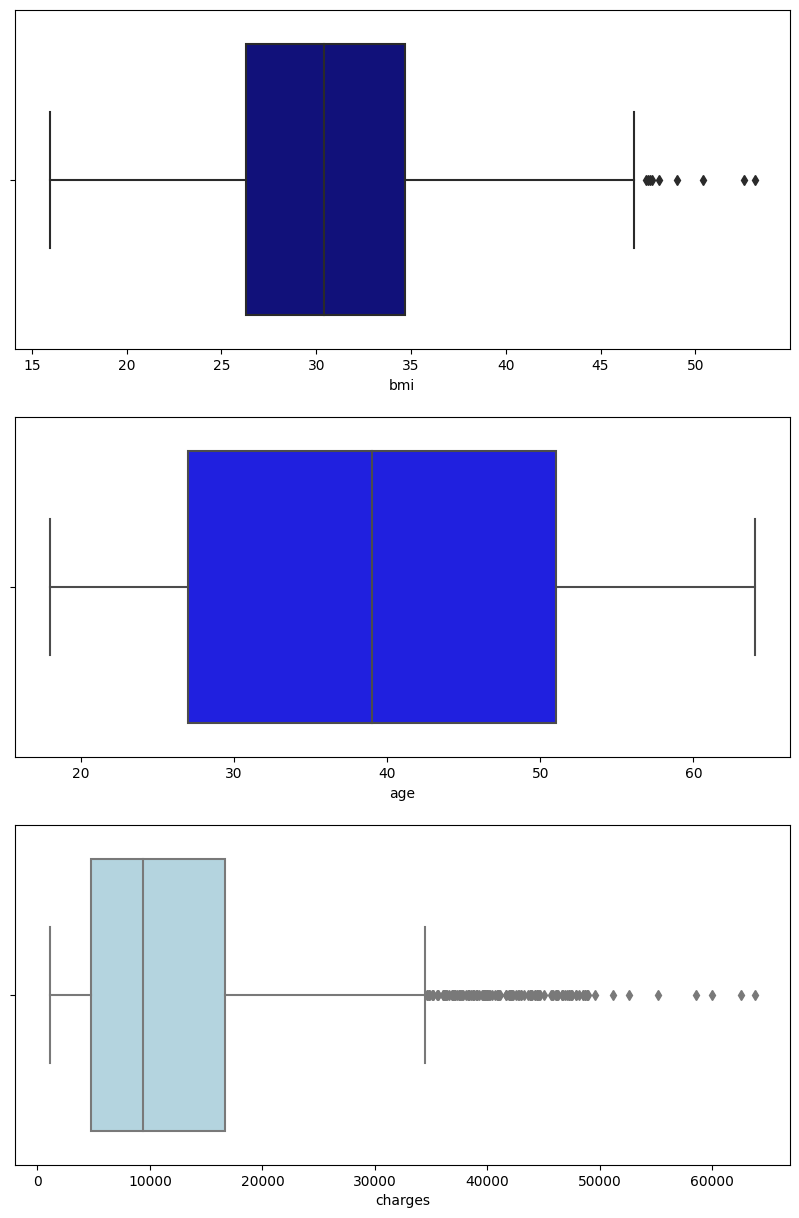

In [35]:
plt.figure(figsize= (10,15))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi, color='darkblue')

plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='blue')

plt.subplot(3,1,3)
sns.boxplot(x= df.charges, color='lightblue')

plt.show()

In [36]:
def detect_outliers_iqr(column, threshold=1.5):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

columns = ['age', 'bmi', 'charges']
outliers = df[columns].apply(detect_outliers_iqr)

print("Number of outliers:")
print(outliers.sum())

Number of outliers:
age          0
bmi          9
charges    139
dtype: int64


BMI shows 9 row of outliers and charges show 139 rwo outliers.

In [37]:
df_cleaned = df[~outliers.any(axis=1)]

print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Original DataFrame shape: (1338, 7)
Cleaned DataFrame shape: (1193, 7)


<div style="background-color: #F6FB7A; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Visualizations</strong></h1>
</div>

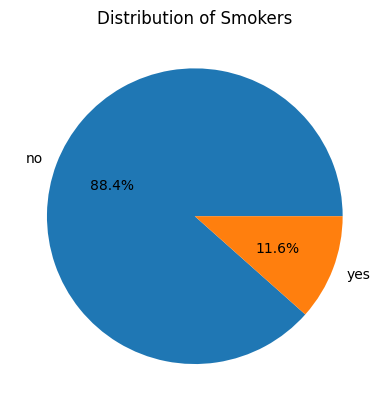

In [38]:
smoker_counts = df_cleaned['smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Smokers')
plt.show()

Many customers are no smoke.

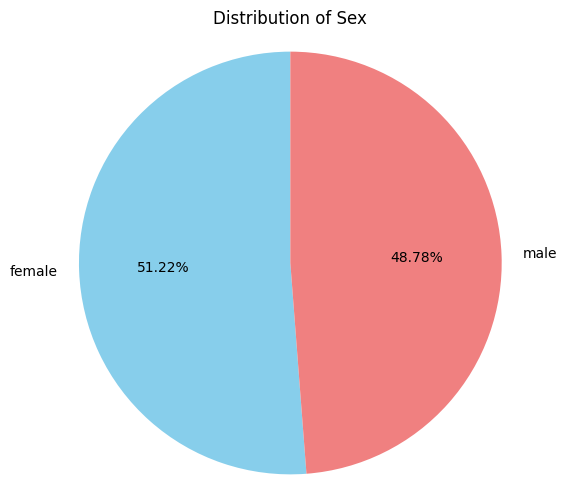

In [39]:
plt.figure(figsize=(6, 6))
sex_counts = df_cleaned['sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%.2f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Distribution of Sex")
plt.axis('equal')
plt.show()

Sex distribution is relatively even.

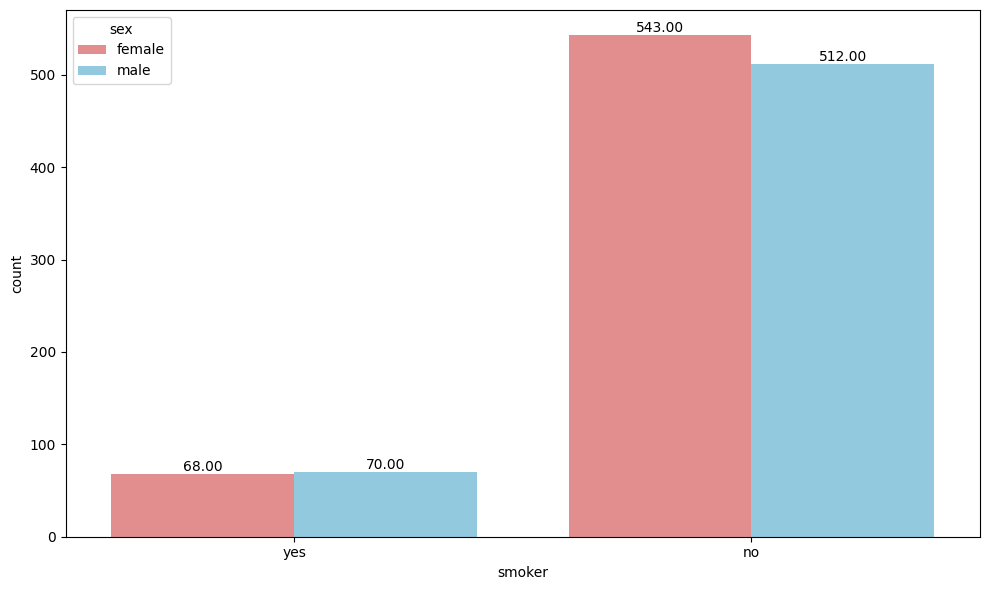

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='smoker', data = df_cleaned,palette=['lightcoral','skyblue'],hue='sex')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()

1. Male smokers are more than the female smoker.
2. Female no smoker are more than male no smoker.

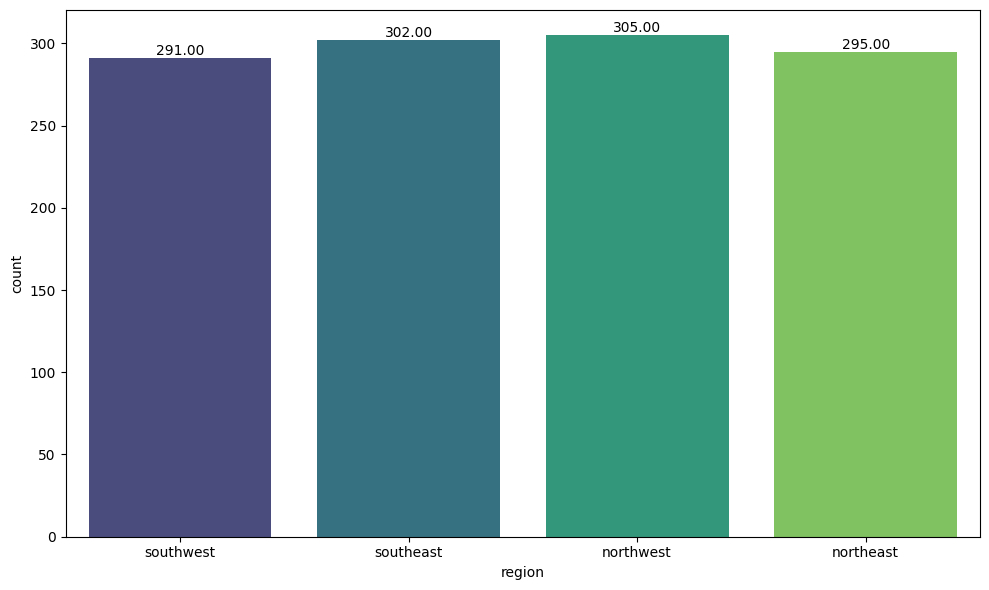

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data = df_cleaned,palette='viridis')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()

Region distribution is fairly balanced, but the Northwest which has the highest number of customers.

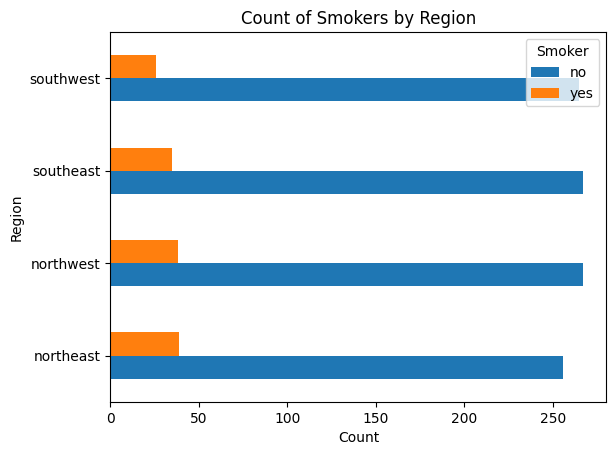

In [42]:
smokers_by_region = df_cleaned.groupby('region')['smoker'].value_counts().unstack()
smokers_by_region.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.show()

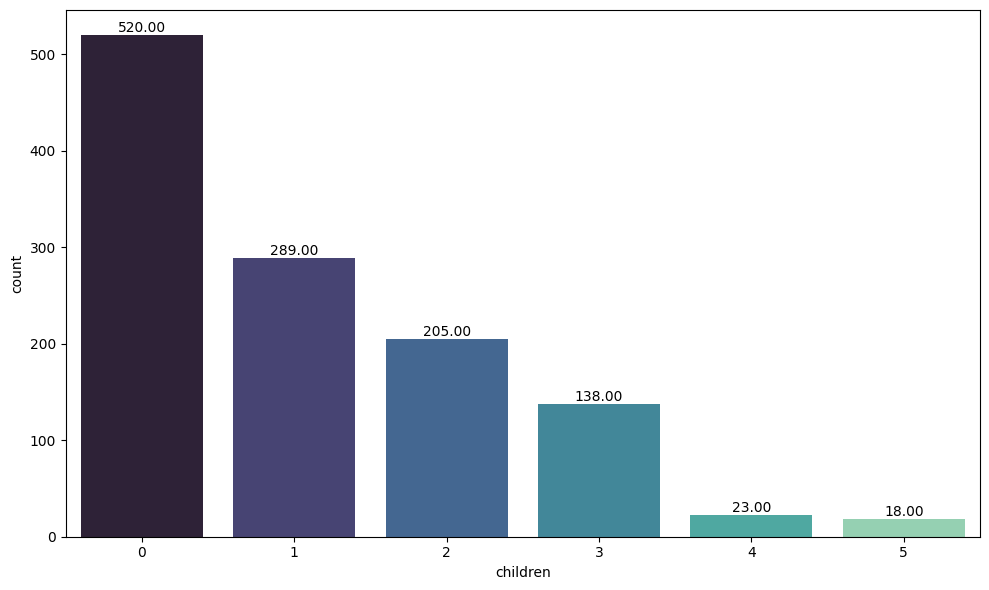

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='children', data = df_cleaned,palette='mako')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()

Many customers have one children and fewer customers have more than 4 childrens.

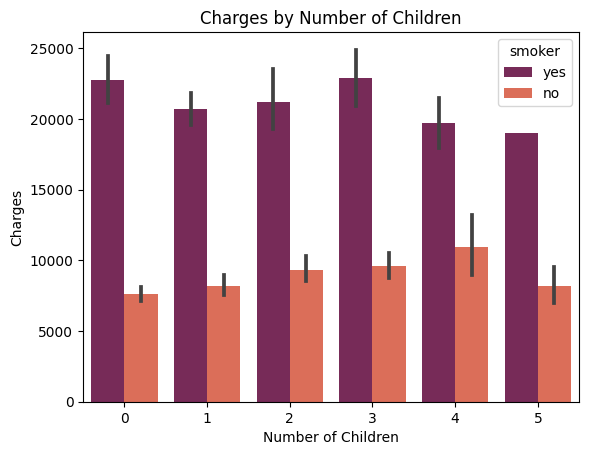

In [44]:
sns.barplot(x=df_cleaned['children'], y=df_cleaned['charges'],palette="rocket",hue=df_cleaned['smoker'])

plt.xlabel('Number of Children')
plt.ylabel('Charges')

plt.title('Charges by Number of Children')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

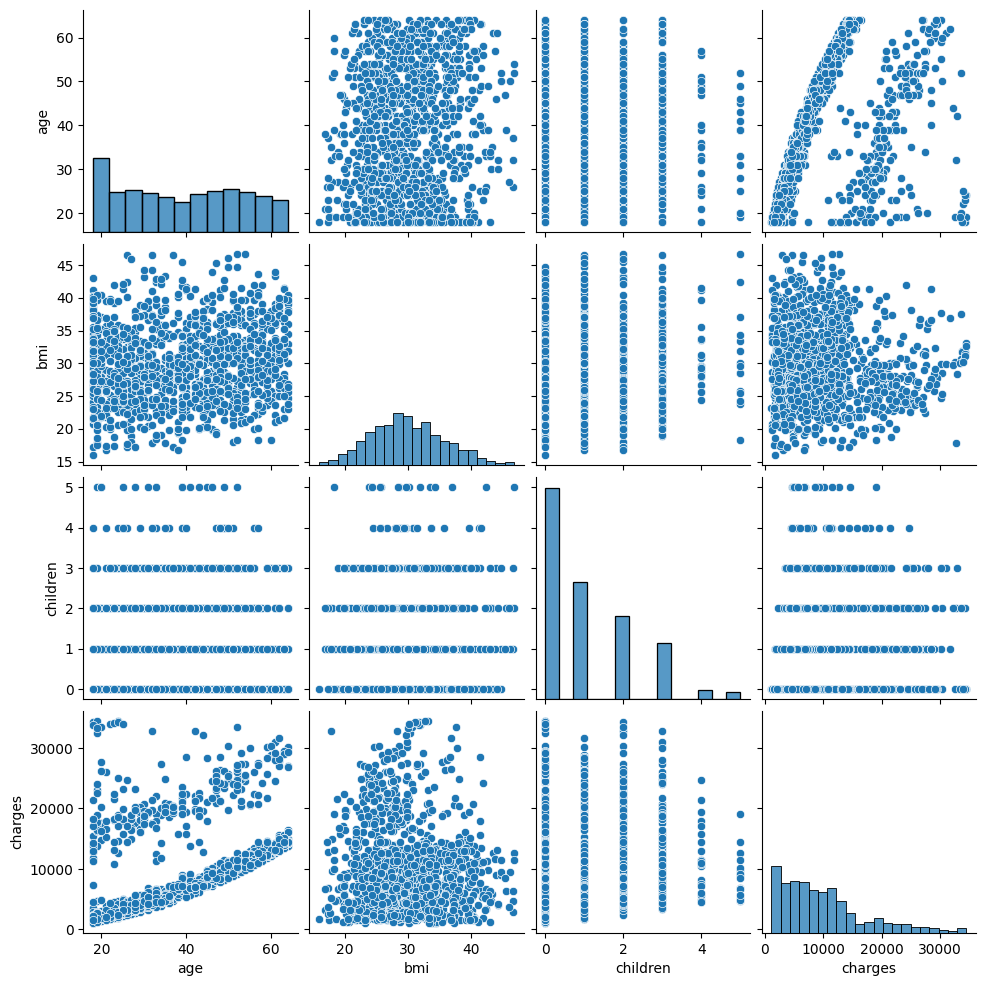

In [45]:
sns.pairplot(df_cleaned)
plt.show()

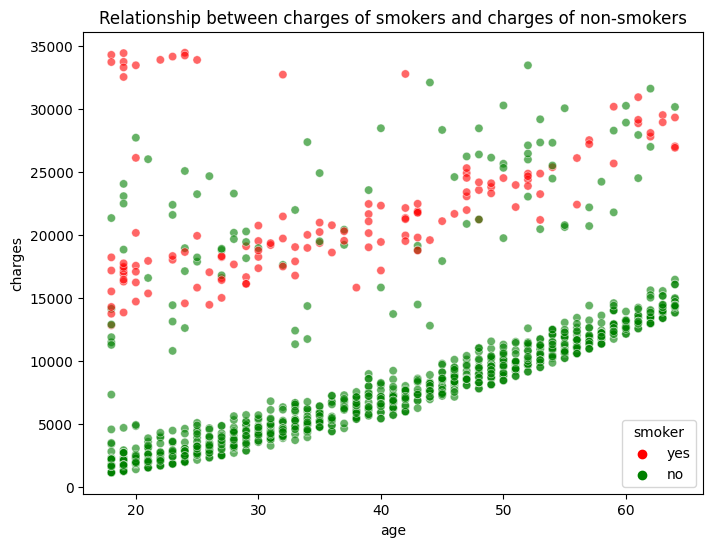

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_cleaned.age, y=df_cleaned.charges,hue=df_cleaned.smoker,palette= ['red','green'] ,alpha=0.6)
plt.title("Relationship between charges of smokers and charges of non-smokers")
plt.show()

1. The scatter plot illustrates the correlation between charges of smokers and non-smokers.
2. As customer age increases, charges also tend to rise.
3. Two customer groups exist: smokers and non-smokers
4. Smoker customers incur higher charges compared to non-smokers.

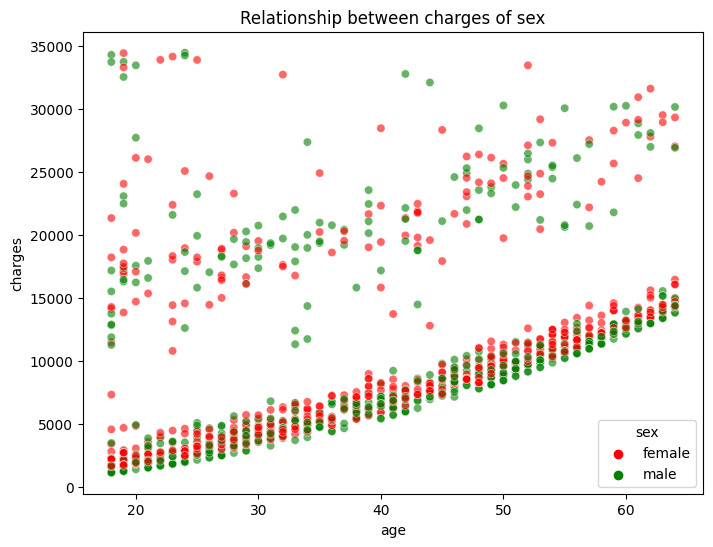

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_cleaned.age, y=df_cleaned.charges,hue=df_cleaned.sex,palette= ['red','green'] ,alpha=0.6)
plt.title("Relationship between charges of sex")
plt.show()

1. The scatter plot illustrates the correlation between sex.
2. As customer age increases, charges also tend to rise
3. Typically, the highest charges are from male and female smoker customers.
4. The lowest charges are from male and female no smoker customers.

In [48]:
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

df_cleaned['bmi_type'] = df['bmi'].apply(classify_bmi)
df_cleaned.head()

/tmp/ipykernel_36/2500268749.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['bmi_type'] = df['bmi'].apply(classify_bmi)


,age,sex,bmi,children,smoker,region,charges,bmi_type
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


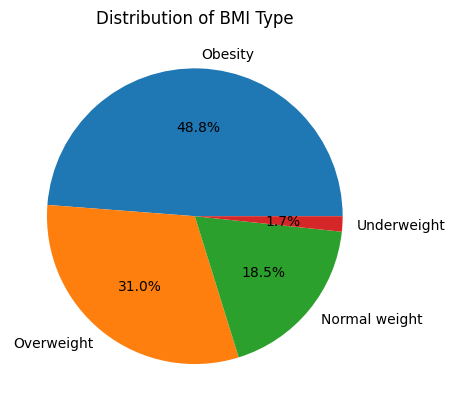

In [49]:
smoker_counts = df_cleaned['bmi_type'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')
plt.title('Distribution of BMI Type')
plt.show()

* Most of the clients are obese




In [50]:
def classify_age_bmi_smoking(row):
    if row['smoker'] == 'yes' and (row['bmi'] >= 30 or row['bmi'] <= 18.5):
        return 'High Risk'
    elif row['smoker'] == 'yes' or (row['bmi'] >= 30 or row['bmi'] <= 18.5):
        return 'Moderate Risk'
    else:
        return 'Low Risk'

df_cleaned['risk'] = df.apply(classify_age_bmi_smoking, axis=1)
df_cleaned.head()

/tmp/ipykernel_36/347818997.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['risk'] = df.apply(classify_age_bmi_smoking, axis=1)


,age,sex,bmi,children,smoker,region,charges,bmi_type,risk
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Moderate Risk
1,18,male,33.770,1,no,southeast,1725.55230,Obesity,Moderate Risk
2,28,male,33.000,3,no,southeast,4449.46200,Obesity,Moderate Risk
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight,Low Risk
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Low Risk


In [51]:
def classify_age_group(age):
    if age < 30:
        return 'Young Adult'
    elif 30 <= age <= 50:
        return 'Middle Aged'
    else:
        return 'Senior'

df_cleaned['age_type'] = df_cleaned['age'].apply(classify_age_group)

df.head()

/tmp/ipykernel_36/3351939795.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age_type'] = df_cleaned['age'].apply(classify_age_group)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


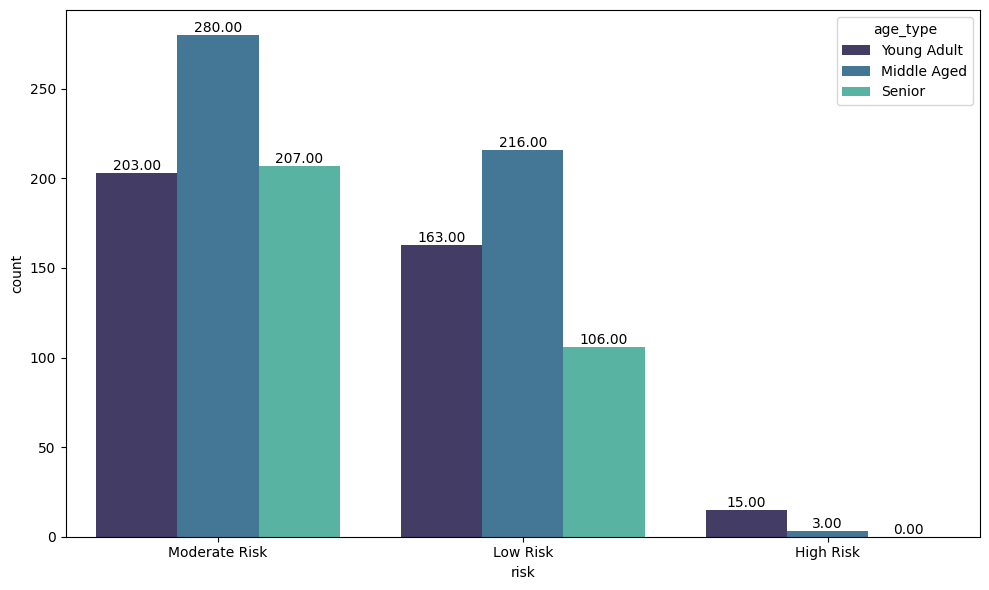

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='risk', data = df_cleaned,palette='mako' , hue='age_type')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()

* Clients with higher risk are of young age while those with lower and moderate risk are of middle age

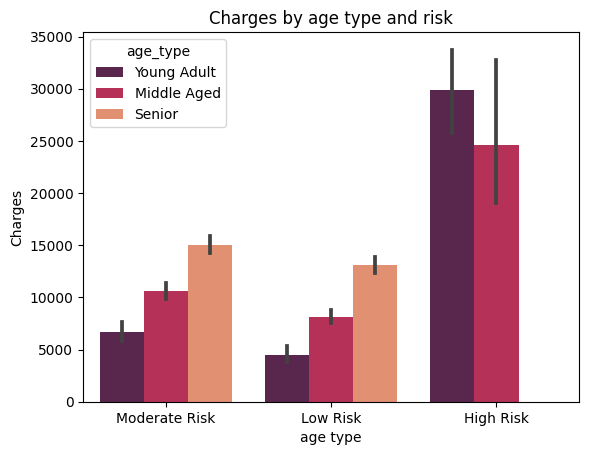

In [53]:
sns.barplot(x=df_cleaned['risk'], y=df_cleaned['charges'],palette="rocket",hue=df_cleaned['age_type'])

plt.xlabel('age type')
plt.ylabel('Charges')

plt.title('Charges by age type and risk')
plt.show()

* Higher risk clients spend more

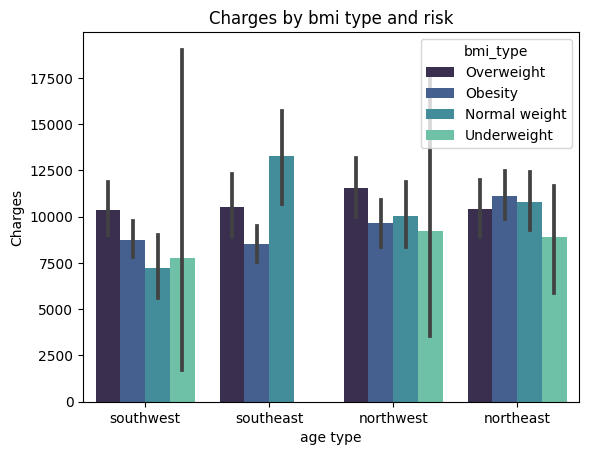

In [54]:
sns.barplot(x=df_cleaned['region'], y=df_cleaned['charges'],palette="mako",hue=df_cleaned['bmi_type'])

plt.xlabel('age type')
plt.ylabel('Charges')

plt.title('Charges by bmi type and risk')
plt.show()

* The charges process in all areas is similar depending on the type of BMI.

<div style="background-color: #F6FB7A; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Conclusion</strong></h1>
</div>

# Key Findings:
1. Age Distribution: The dataset shows a uniform distribution of ages.
2. BMI Distribution: The BMI values follow a normal distribution but contain some outliers.
3. Charges Distribution: Insurance charges exhibit a right-skewed distribution, meaning a small portion of customers have very high charges.
4. Outliers:
   BMI has 9 outliers.
   Charges contain 139 outliers, likely influencing the distribution.


# Insights:
1. Smoking Impact on Charges: There is a significant difference in charges between smokers and non-smokers. Smokers tend to have higher insurance costs, which aligns with health risks associated with smoking.
2. Gender Distribution: The dataset shows a balanced distribution between males and females.
3. Age vs. Charges: Older individuals generally have higher insurance costs, indicating a correlation between age and healthcare expenses.
3. BMI and Charges: Higher BMI values seem to increase the insurance charges, suggesting a link between obesity and medical expenses.
4. Regional Distribution: The dataset does not show any extreme variations in insurance charges across different regions, suggesting that location does not significantly impact costs.